<a href="https://colab.research.google.com/github/ViKing-Coder-jpg/Plutus.ai/blob/main/Plutus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Plutus: Your Personal Financial Advising AI***

Plutus is an advanced AI-powered financial advisor designed to help you optimize your money flow and accurately predict your credit score. Leveraging cutting-edge machine learning techniques, Plutus analyzes your financial data to provide personalized insights and recommendations. Whether you're looking to improve your budgeting, manage debt, or understand the factors impacting your credit health, Plutus is here to guide you towards a stronger financial future.

## Phase 1: Credit Risk Score Predictor

In this initial phase, Plutus focuses on building a robust credit risk score predictor. Utilizing fundamental machine learning algorithms such as Logistic Regression and Decision Tree, this module analyzes various financial indicators to assess an individual's creditworthiness. The goal is to provide an accurate prediction of credit risk, empowering users to understand their financial standing and take proactive steps towards improving it.

# Imports, Data Selection and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

Matplotlib is building the font cache; this may take a moment.
/Users/vinayakmac/Desktop/Projects/Plutus.ai/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

In [3]:
path = kagglehub.dataset_download("adilshamim8/credit-risk-benchmark-dataset")
df = pd.read_csv(path+'/Credit Risk Benchmark Dataset.csv')

100%|██████████| 309k/309k [00:01<00:00, 288kB/s]

Extracting files...


In [4]:
print("Dataset Shape:", df.shape)
print('Empty Cell :',df.isna().sum().sum())



Dataset Shape: (16714, 11)
Empty Cell : 0


In [5]:
X = df.drop("dlq_2yrs", axis=1)
y = df["dlq_2yrs"]

In [6]:
X = X.fillna(X.median())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=32
)

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression Model Training and Evaluation

In [10]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [11]:
# y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
threshold=0.4
y_pred = (y_prob >= threshold).astype(int)

In [12]:
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.7086449297038588
Precision: 0.687401986408782
Recall: 0.7776463630987581
ROC-AUC: 0.7984751919791863

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1652
           1       0.69      0.78      0.73      1691

    accuracy                           0.71      3343
   macro avg       0.71      0.71      0.71      3343
weighted avg       0.71      0.71      0.71      3343



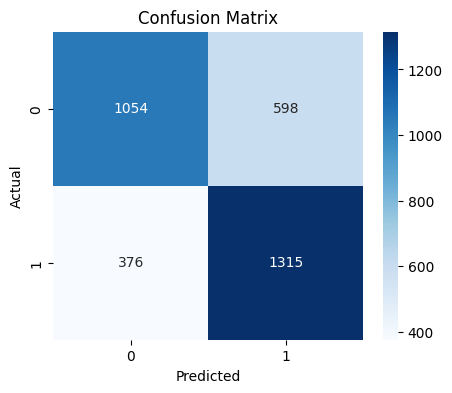

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

plt.show()

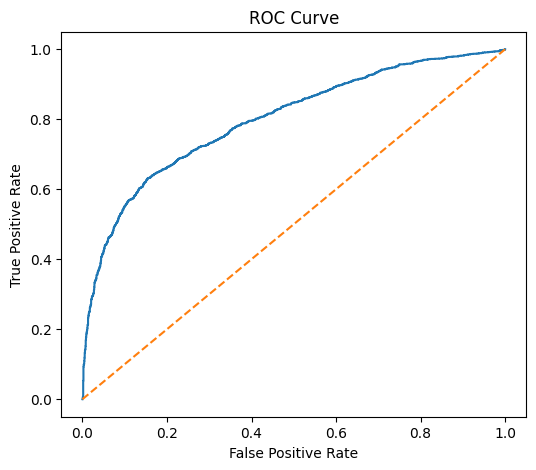

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

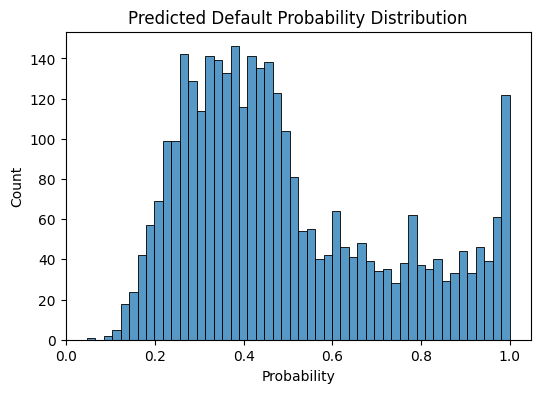

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(y_prob, bins=50)
plt.title("Predicted Default Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.savefig("Predicted Default Probability Distribution.png", dpi=300, bbox_inches='tight')

plt.show()

In [16]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Risk Factors:")
print(coefficients)


Top Risk Factors:
       Feature  Coefficient
6      late_90     5.810623
2   late_30_59     4.513681
8   late_60_89     3.460245
7  real_estate     0.115596
9   dependents     0.062755
5  open_credit     0.046083
0     rev_util    -0.014325
3   debt_ratio    -0.067574
4  monthly_inc    -0.175772
1          age    -0.385145


<Figure size 800x1000 with 0 Axes>

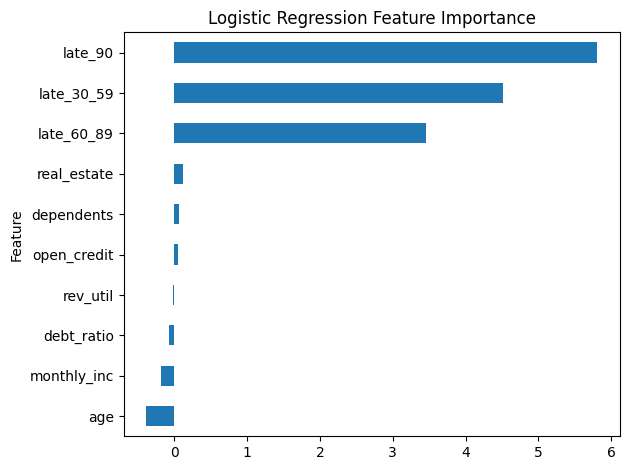

In [17]:
plt.figure(figsize=(8,10))
coefficients.sort_values("Coefficient").plot(
    x="Feature",
    y="Coefficient",
    kind="barh",
    legend=False
)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout()
plt.savefig("Logistic Regression Feature Importance.png", dpi=300, bbox_inches='tight')

plt.show()

#Decision Tree Model Training and Evaluation

In [18]:
model2=DecisionTreeClassifier(max_depth=3)
model2.fit(X_train_scaled, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [19]:
y_pred_2 = model2.predict(X_test_scaled)
y_prob_2 = model2.predict_proba(X_test_scaled)[:, 1]


In [20]:
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("Precision:", precision_score(y_test, y_pred_2))
print("Recall:", recall_score(y_test, y_pred_2))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_2))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_2))


Model Performance:
Accuracy: 0.746036494166916
Precision: 0.7145769622833843
Recall: 0.8290952099349498
ROC-AUC: 0.8073741414095132

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1652
           1       0.71      0.83      0.77      1691

    accuracy                           0.75      3343
   macro avg       0.75      0.75      0.74      3343
weighted avg       0.75      0.75      0.74      3343



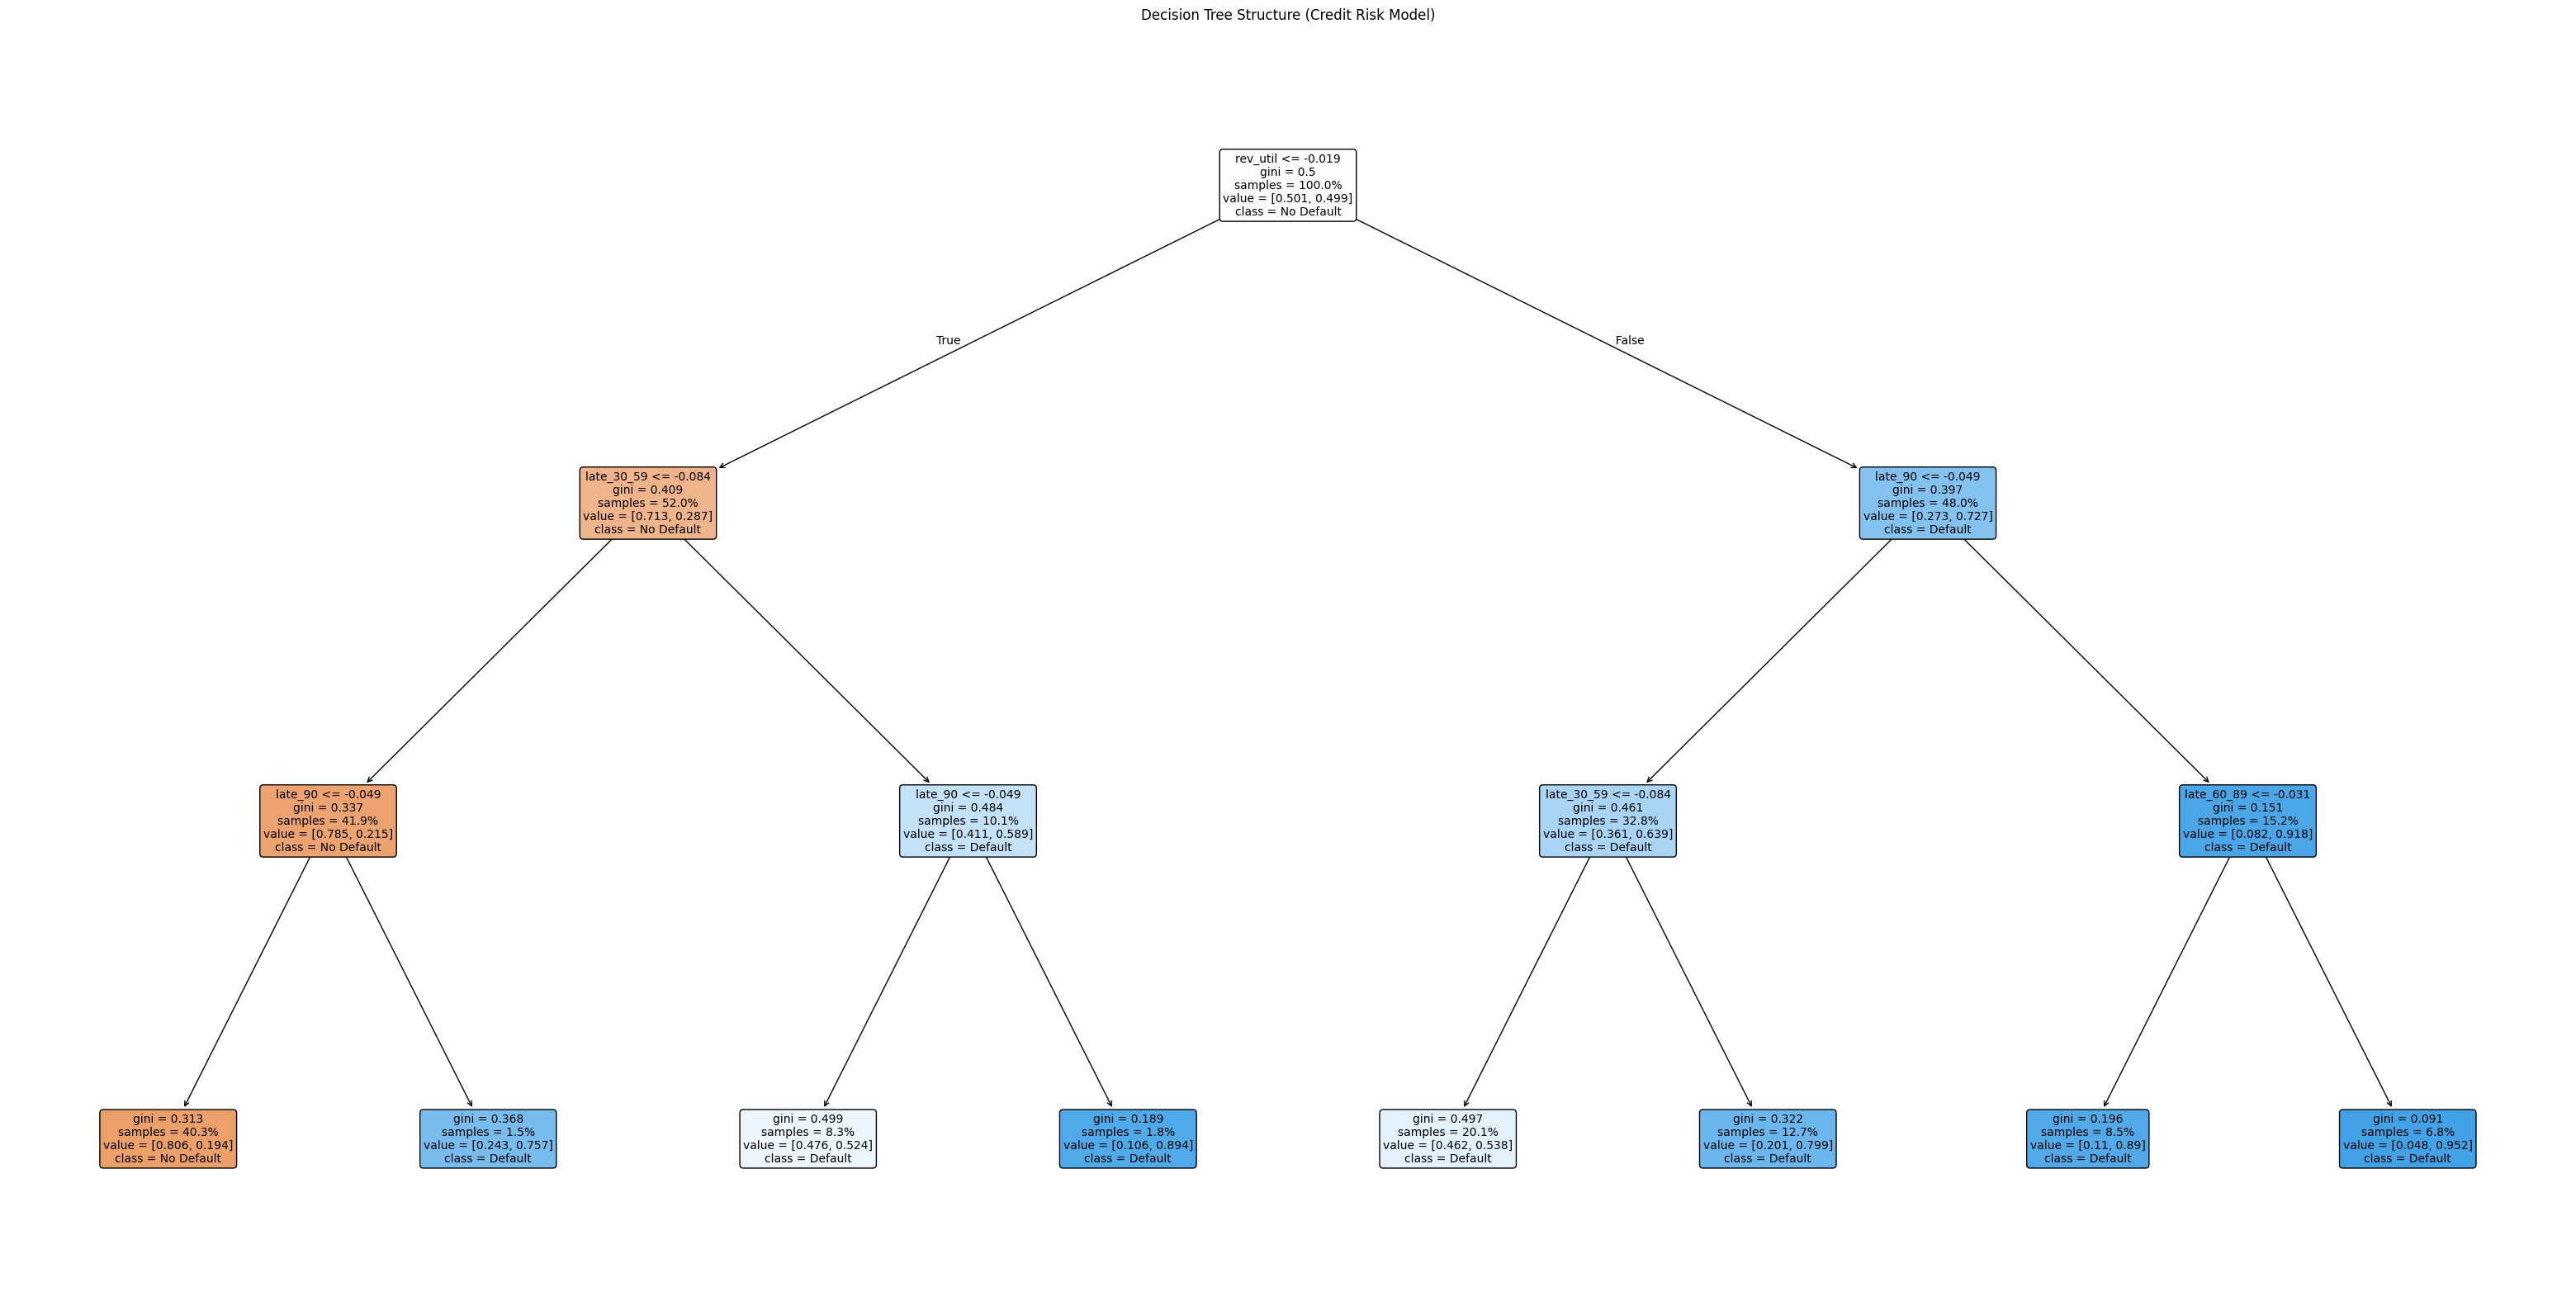

In [21]:


plt.figure(figsize=(40,20))

plot_tree(
    model2,
    feature_names=X.columns,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True
)

plt.title("Decision Tree Structure (Credit Risk Model)")
plt.show()

<Figure size 800x600 with 0 Axes>

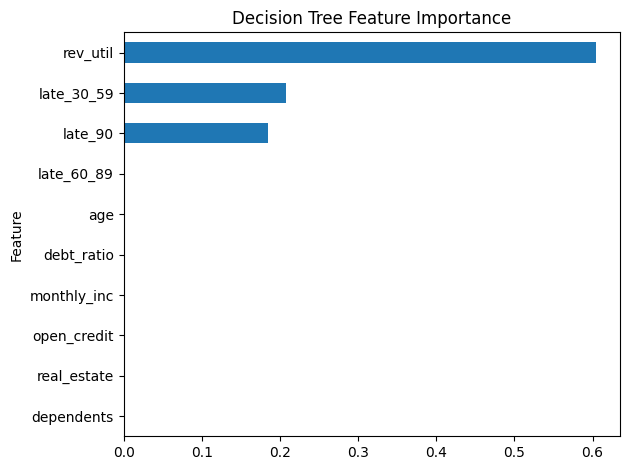

In [22]:

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model2.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
importances.plot(
    x="Feature",
    y="Importance",
    kind="barh",
    legend=False
)

plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [23]:
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(model2, 'decision_tree_model.pkl')

['decision_tree_model.pkl']